# PROJECT






##                 Predicting wheather employee of an organization should get Promotion or Not ?









Your client is very large MNC Company they have 9 broad verticals organization. One of the problem your client is facing is around identifying the right people for promotion (only for managers position and below) and prepare them in time.


Currently process , they are following


1) They first identify set of employees based on recommendation/past peformance 

2) Selected employees go through the training and evaluation program for each vertical. These program are based on he required skill of each vertical.

3) At the end of program based on various factors sucha as training peoformance , and employee gets an promotion.

In [13]:
# Importing libarieries 

In [14]:
! pip install sklearn

In [15]:
! pip install ipywidgets

In [16]:
!pip install sweetviz

In [17]:
! pip install imblearn  

# Libary Usages


### Matplotlib vs seaborn
Seborn provides advance staistical operations and graphs 

### sweetviz libary 
It is used for EDA purpose.

### Sklearn 
This is used for Machine Learning Projects

### ipywidgets 
This libary 
widgets used for making a program interactive


### imblearn
 used for imblanced datasets

In [18]:
# Lets import libaries 

In [19]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

# setting size of figures
plt.rcParams['figure.figsize']=(16,5)
# setting style of plot
plt.style.use('fivethirtyeight')

# For interactivity
import ipywidgets as widgets 
from ipywidgets import interact
from ipywidgets import interact_manual

# for EDA(explorary Data Analysis)
import sweetviz

# for machine learning
import sklearn 
import imblearn 

In [20]:
# used for selecting style of plot 
# fivethirtyeight is best 
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [21]:
# Reading DataSets

In [22]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [23]:
# if datsset is not csv
# train = pd.read_excel('Workshop Datasets/train.excel')

In [24]:
# Show first 5 columns
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [25]:
# show last 5 columns
train.tail()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0
54807,51526,HR,region_22,Bachelor's,m,other,1,27,1.0,5,0,0,49,0


In [26]:
test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [27]:
# Check the datatype 
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [28]:
train['is_promoted'].value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

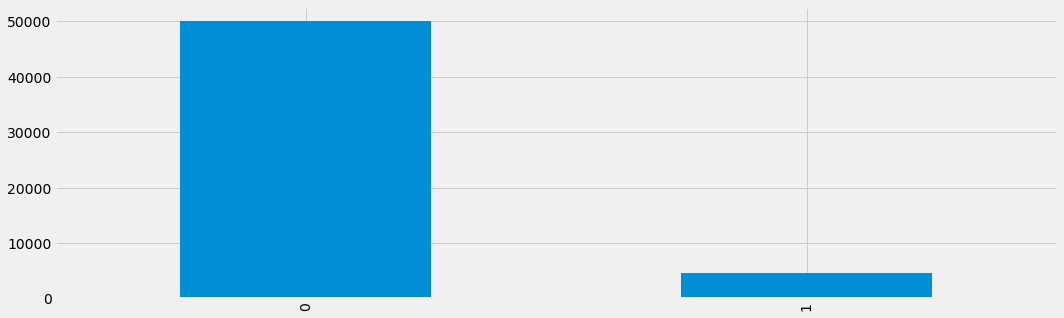

In [29]:
train['is_promoted'].value_counts().plot(kind = 'bar')

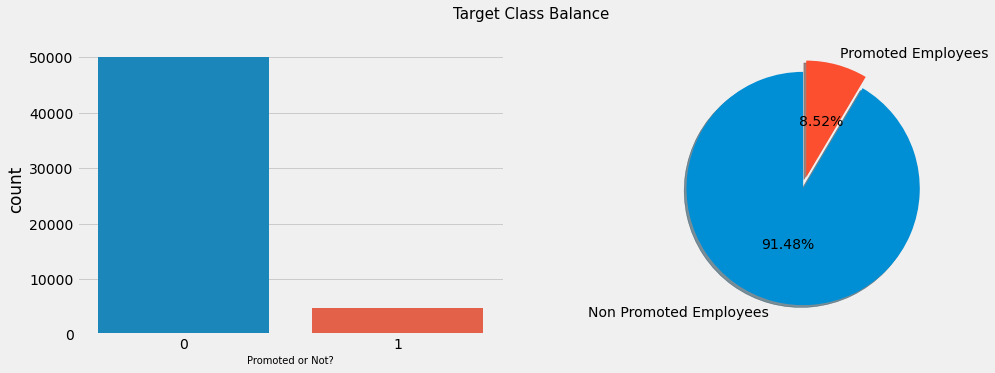

In [30]:
# Let's check the target class Balance
plt.rcParams['figure.figsize']=(15,5)
plt.style.use('fivethirtyeight')

plt.subplot(1,2,1)
sns.countplot(train['is_promoted'],)

# Labelling 
plt.xlabel('Promoted or Not?', fontsize= 10)

# for piechart
plt.subplot(1,2,2)
train['is_promoted'].value_counts().plot(kind = 'pie',explode = [0,0.1], autopct= '%.2f%%',
                                         startangle = 90,
                                         labels= [ 'Non Promoted Employees',
                                                  'Promoted Employees'],shadow = True,pctdistance = 0.5)

plt.axis('off')

plt.suptitle('Target Class Balance', fontsize = 15)
plt.show()

In [31]:
# Let make a report using sweetviz for complete EDA
my_report = sweetviz.compare([train, 'Train'],[test,'Test'], 'is_promoted')
my_report.show_html('Report.html')


Report Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# Descrtiptive Statistics

Descriptive Statistics is important step to understand the  Data and take out insights.

for Categorical columns we check for for stats ,count , frequency and unique elements.

In [32]:
# let's check  descritptive statistics for numerical columns
train.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [33]:
# let's check descriptive statistics for categorical columns
train.describe(include='object')

,department,region,education,gender,recruitment_channel
count,54808,54808,52399,54808,54808
unique,9,34,3,2,3
top,Sales & Marketing,region_2,Bachelor's,m,other
freq,16840,12343,36669,38496,30446


In [34]:
# let's make interactive function to check the statistics of these numerical columns at a time 

@interact
def check(column=list(train.select_dtypes('number').columns[1:])):
    print('Maximum Value :', train[column].max())
    print('Minimum Value:',train[column].min())
    print('Mean:{0:2f}'.format(train[column].mean()))
    print('Median:',train[column].median())    
    print('Standard Deviation:{0:2f}'.format(train[column].std()))   

interactive(children=(Dropdown(description='column', options=('no_of_trainings', 'age', 'previous_year_rating'…

###  Treatment of Missing values 

#### Treatment of missing values is very imp step in ML Model Creation

### Types of Missing values
1) Missing values Random
2)Missing values are not random
3) Missing values at completely random

### What we can do to impute or treate missing values to make good ML Model?

Use Business logic to impute the missing values

use Statistical methods - Mean , Median and Mode

use ML techniques to impute the misssing values.

can delete missing values when the missing values is very high.

### When to  use Mean , Median and Mode ?

Use Mean - when we don't have outliers in the datasets for Numerical Variables.

Use Median - when we  have outliers in the datasets for Numerical Variables.

Use Mode - when we have cateorgical  variables

In [35]:
# missing vlues in training datasets 
train.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [36]:
# missing values in training data set

# lets calculate the total missing values in the dataset
train_total = train.isnull().sum()

# lets calculate the percentage of missing values in the dataset
train_percent = ((train.isnull().sum()/train.shape[0])*100).round(2)

# lets calculate the percentage of missing values in the dataset
test_percent = ((test.isnull().sum()/test.shape[0])*100).round(2)

# lets calculate the total missing values in the dataset
test_total = test.isnull().sum()

# Let's check the percentage of missing vlues in training datasets 
train.percent=((train.isnull().sum()/train.shape[0])*100).round(2)

# lets make a dataset consisting of total no. of missing values and percentage of missing values in the dataset
train_missing_data = pd.concat([train_total, train_percent, test_total, test_percent],
                                axis=1, 
                                keys=['Train_Total', 'Train_Percent %','Test_Total', 'Test_Percent %'],
                                sort = True)

# lets check the head
train_missing_data.style.bar(color = ['gold'])

<ipython-input-36-4397b7f6d690>:16: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  train.percent=((train.isnull().sum()/train.shape[0])*100).round(2)


,Train_Total,Train_Percent %,Test_Total,Test_Percent %
KPIs_met >80%,0,0.000000,0.000000,0.000000
age,0,0.000000,0.000000,0.000000
avg_training_score,0,0.000000,0.000000,0.000000
awards_won?,0,0.000000,0.000000,0.000000
department,0,0.000000,0.000000,0.000000
education,2409,4.400000,1034.000000,4.400000
employee_id,0,0.000000,0.000000,0.000000
gender,0,0.000000,0.000000,0.000000
is_promoted,0,0.000000,nan,nan
length_of_service,0,0.000000,0.000000,0.000000


We can see from the above table, that Only two columns have missing values in Train and Test Dataset both. Also, the Percentage of Missing values is around 4 and 7% in education, and previous_year_rating respectively. So, do not have delete any missing values, we can simply impute the values using Mean, Median, and Mode Values. 

Lets check the Data Types of these Columns, so that we can impute the missing values in these columns.

In [37]:
# lets impute the missing values in the Training Data
train['education']= train['education'].fillna(train[ 'education'].mode()[0])
train['previous_year_rating'] = train['previous_year_rating'].fillna(train['previous_year_rating'].mode()[0])

# lets check whether the Null values are still present or not?
print("Number of Missing Values Left in the Training Data :", train.isnull().sum())

Number of Missing Values Left in the Training Data : employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64


# Outliers Detection using Box Plots

The presence of outliers in a classification or regression dataset can result in a poor fit and lower predictive modeling performance. Instead, automatic outlier detection methods can be used in the modeling pipeline and compared, just like other data preparation transforms that may be applied to the dataset

In [38]:
# lets check the columns where we can have outliers 
train.select_dtypes('number').head()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,1,35,5.0,8,1,0,49,0
1,65141,1,30,5.0,4,0,0,60,0
2,7513,1,34,3.0,7,0,0,50,0
3,2542,2,39,1.0,10,0,0,50,0
4,48945,1,45,3.0,2,0,0,73,0


In [39]:
train['awards_won?'].value_counts()

0    53538
1     1270
Name: awards_won?, dtype: int64

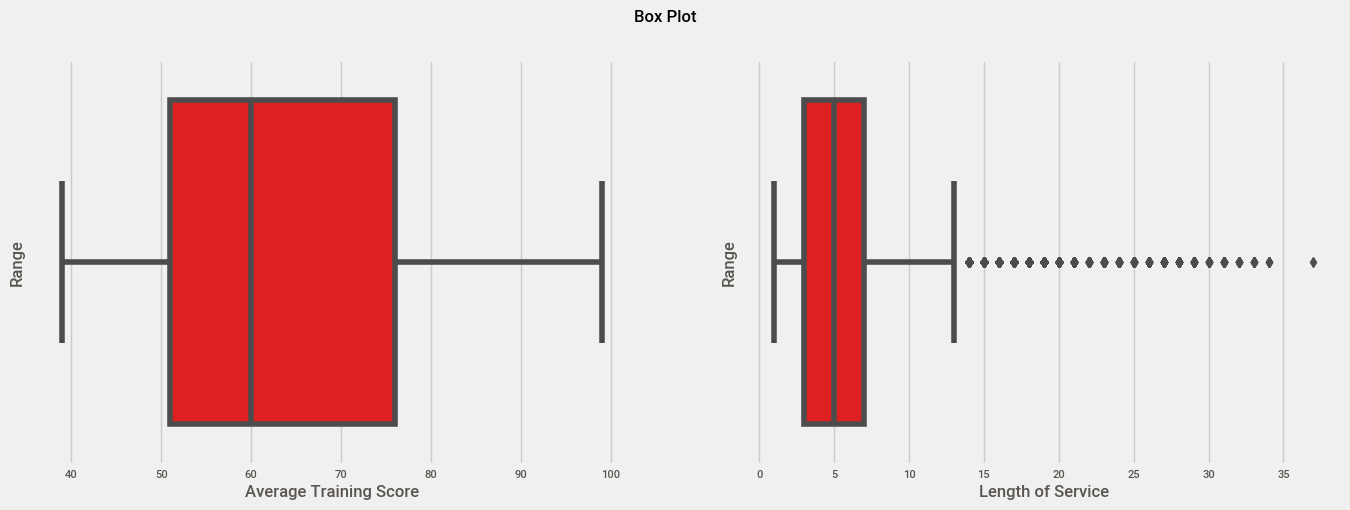

In [40]:
# lets check the boxplots for the columns where we suspect for outliers
plt.rcParams['figure.figsize']= (15,5)
plt.style.use('fivethirtyeight')


# Box plot for average training score
plt.subplot(1,2,1)
sns.boxplot(train['avg_training_score'],color = 'red')
plt.xlabel('Average Training Score',fontsize = 12)
plt.ylabel('Range',fontsize = 12)

# Box plot for length of  service 
plt.subplot(1,2,2)
sns.boxplot(train['length_of_service'],color = 'red')
plt.xlabel('Length of Service',fontsize = 12)
plt.ylabel('Range',fontsize=12)

plt.suptitle('Box Plot', fontsize=12)
plt.show()

# Univariate Analysis

Univariate analysis is perhaps the simplest form of statistical analysis. Like other forms of statistics, it can be inferential or descriptive. The key fact is that only one variable is involved. Univariate analysis can yield misleading results in cases in which multivariate analysis is more appropriate.

This is an Essential step, to understand the variables present in the dataset one by one.

First, we will check the Univariate Analysis for Numerical Columns to check for Outliers by using Box plots.

Then, we will use Distribution plots to check the distribution of the Numerical Columns in the Dataset.

After that we will check the Univariate Analysis for Categorical Columns using Pie charts, and Count plots.

We Use Pie charts, when we have very few categories in the categorical column, and we use count plots we have more categorises in the dataset.

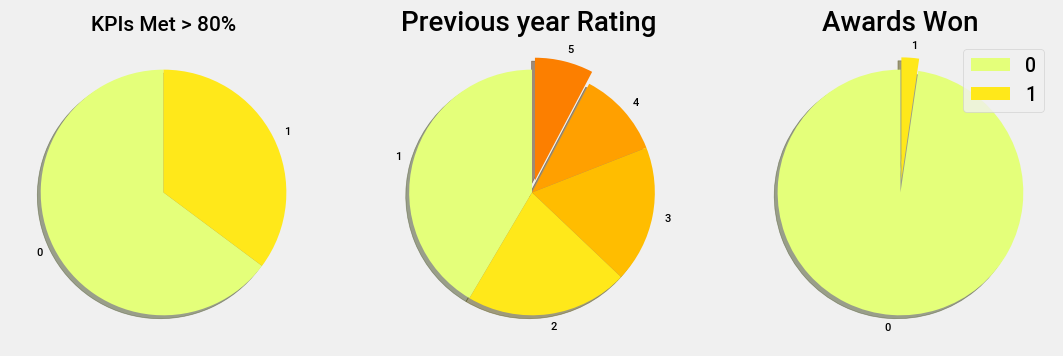

In [41]:
# let's plot pie charts for the columns where we have few categories
plt.rcParams['figure.figsize']=(12,5)
plt.style.use('fivethirtyeight')

# plotting a pie chart to represent share of Previous year Rating of the Employees
plt.subplot(1,3,1)
labels = ['0','1']
sizes = train['KPIs_met >80%'].value_counts()
colors = plt.cm.Wistia(np.linspace(0, 1, 5))
explode = [0, 0]


plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title('KPIs Met > 80%', fontsize = 15)

# plotting a pie chart to represent share of Previous year Rating of the Employees
plt.subplot(1,3,2)
labels = ['1','2','3','4', '5']
sizes = train['previous_year_rating'].value_counts()
colors = plt.cm.Wistia(np.linspace(0,1,5))
explode = [0,0,0,0,0.1]

plt.pie(sizes,labels = labels , colors = colors , explode = explode , shadow = True , startangle = 90)
plt.title('Previous year Rating ', fontsize = 20)


# plotting a pie chart to represent share of Previous year Rating of the Employees
plt.subplot(1,3,3)
labels = ['0', '1']
sizes = train['awards_won?'].value_counts()
colors = plt.cm.Wistia(np.linspace(0,1,5))
explode = [0,0.1]

plt.pie(sizes, labels = labels , colors = colors , explode = explode , shadow = True , startangle = 90)
plt.title('Awards Won',fontsize = 20)

plt.legend()
plt.show()

We, can see that there are some pie charts, we have for representing KPIs, Previous year Ratings, and Awards Won?

Also, The one Big Pattern is that only some of the employees could reach above 80% of KPIs set.
Most of the Employees have a very low rating for the previous year, and
very few employees, probably 2% of them could get awards for their work, which is normal.

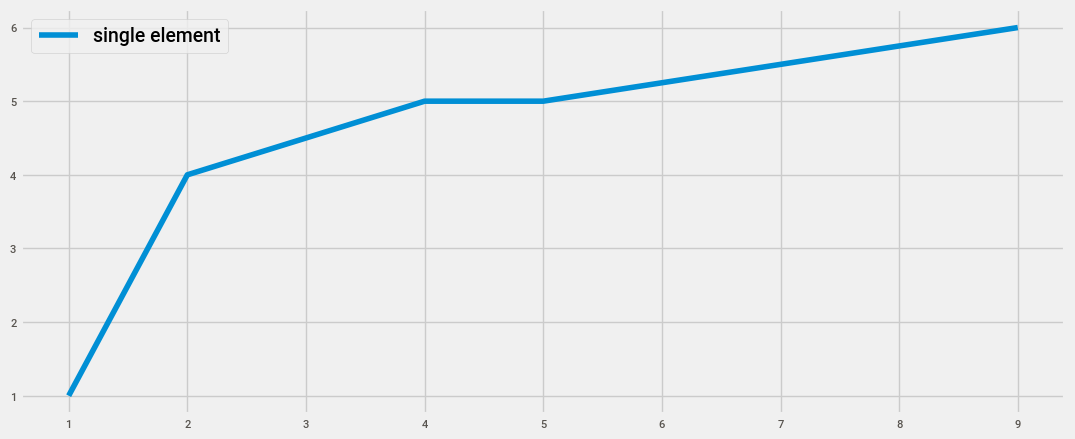

In [42]:
# legend() Demonstration 
# A legend is an area describing the elements of the graph. In the matplotlib library, there’s a function called legend() which is used to Place a legend on the axes.
x = [1,2,4,5,9]
y = [1,4,5,5,6]
plt.plot(x,y)
plt.legend(['single element']) 
plt.show()

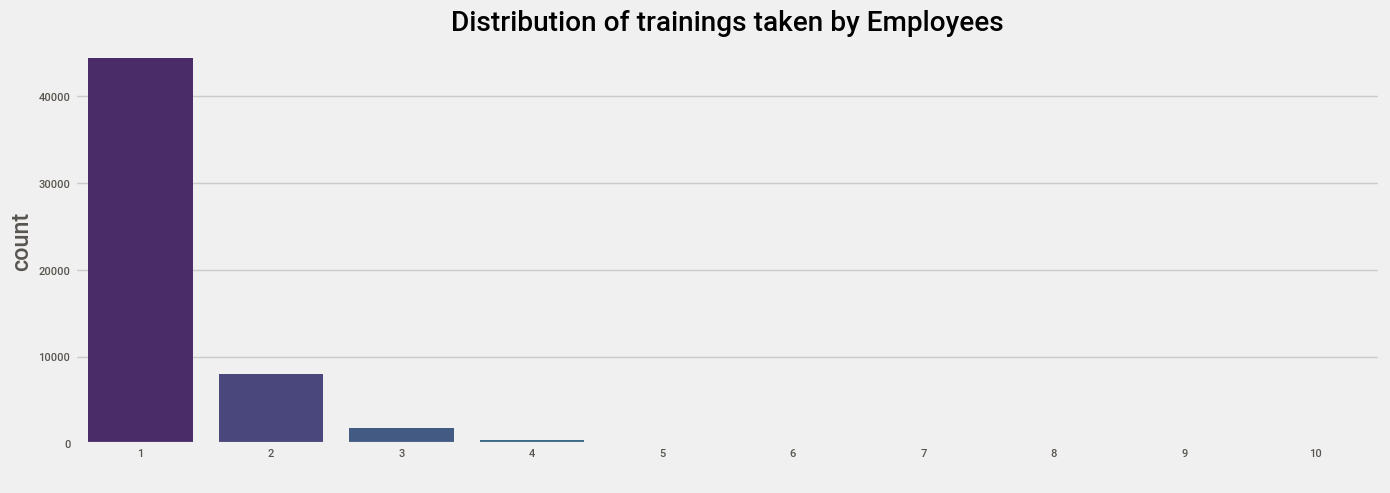

In [43]:
# lets check the distribution of trainings undertaken by employees
plt.rcParams['figure.figsize']=(15,5)
sns.countplot(train['no_of_trainings'], palette = 'viridis')
plt.xlabel( ' ', fontsize = 14)
plt.title('Distribution of trainings taken by Employees')
plt.show()

The abov Countplot, where are checking the distribution of trainings undertaken by the Employee, It is clearly visible that 80 % of the employees have taken the training only once, and there are negligible no. of employees, who took trainings more than thrice.

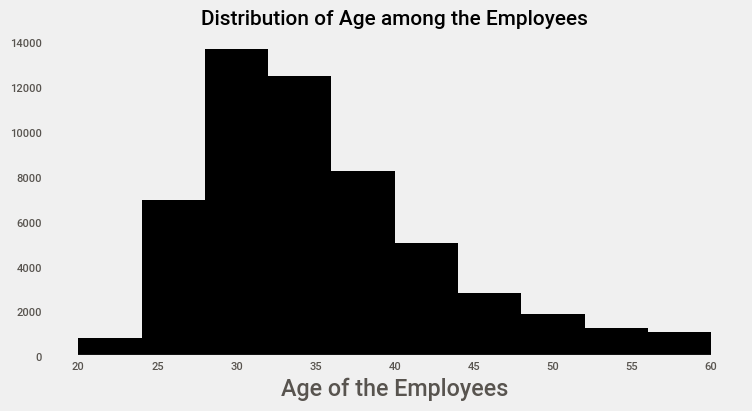

In [44]:
# let's Check the Age of Employees
plt.rcParams['figure.figsize']= (8,4)
plt.hist(train['age'],color = 'black')
plt.title('Distribution of Age among the Employees',fontsize = 15)
plt.xlabel('Age of the Employees')
plt.grid()
plt.show()

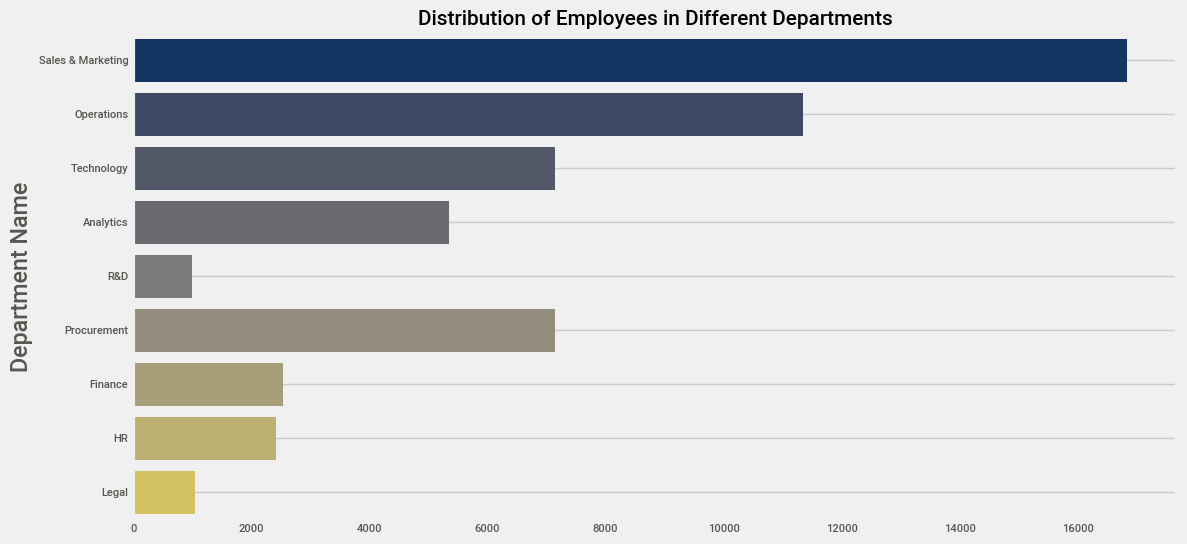

In [45]:
# lets check different Departments
plt.rcParams['figure.figsize']= (12,6)
sns.countplot(y = train['department'], palette = 'cividis', orient = 'v')
plt.xlabel('')
plt.ylabel('Department Name')
plt.title('Distribution of Employees in Different Departments', fontsize = 15)
plt.grid()
plt.show()

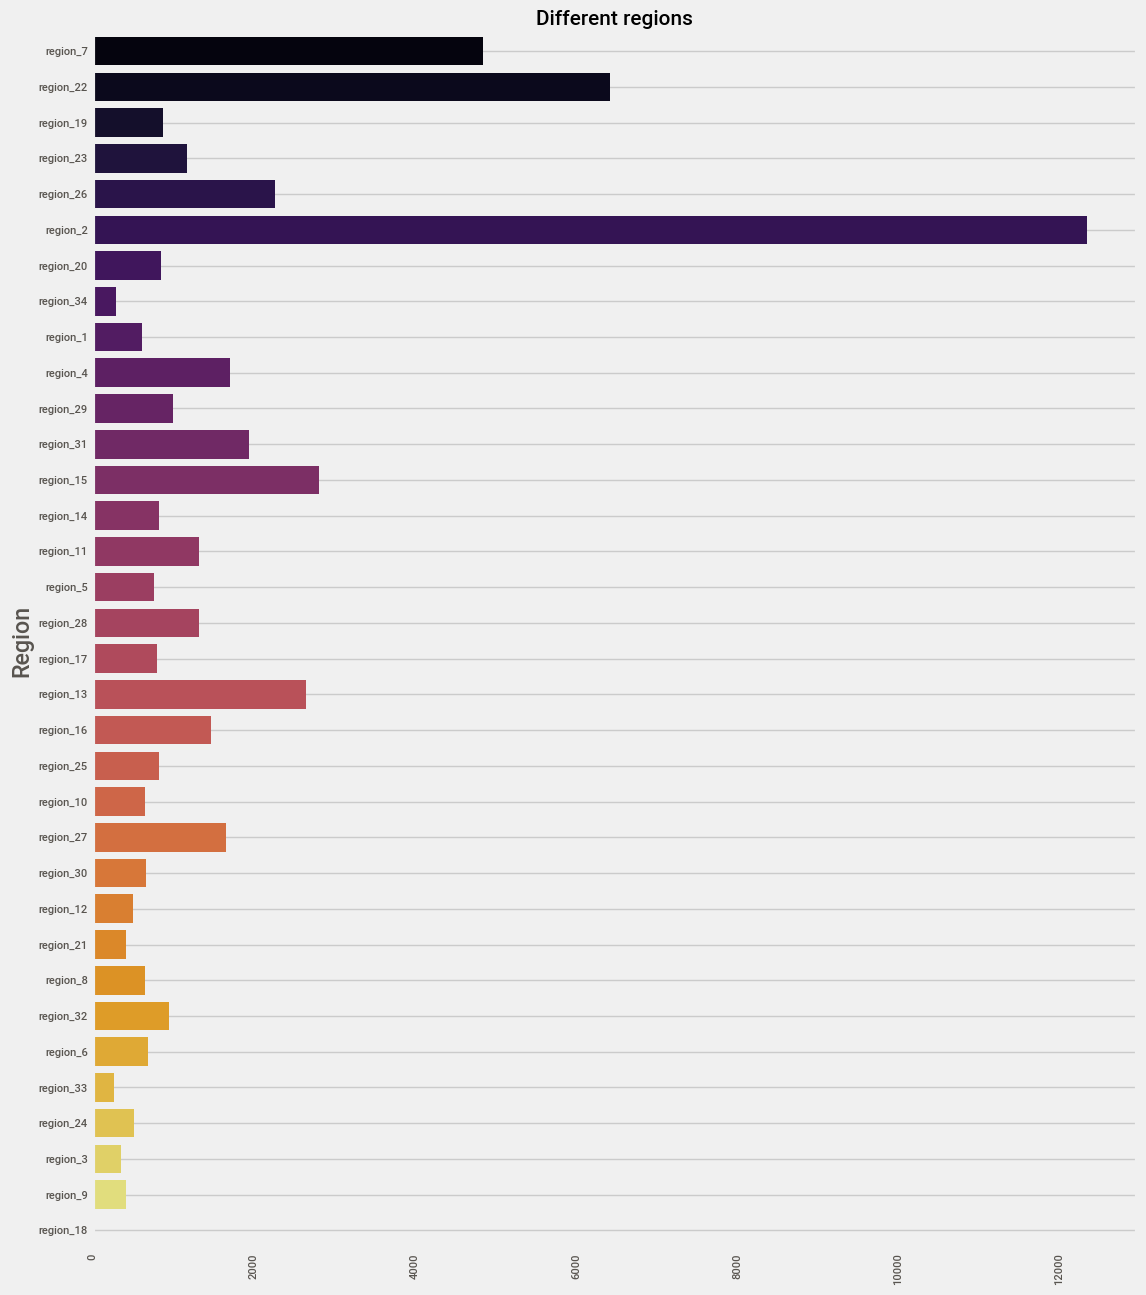

In [46]:
# Let's check the distribution of different regions 
plt.rcParams['figure.figsize'] = (12,15)
sns.countplot(y= train['region'], palette = 'inferno',orient= 'v')
plt.xlabel('')
plt.ylabel('Region')
plt.xticks(rotation = 90)
plt.title('Different regions', fontsize = 15)
plt.grid()
plt.show()

Text(0.5, 1.0, 'Recruitment Channel')

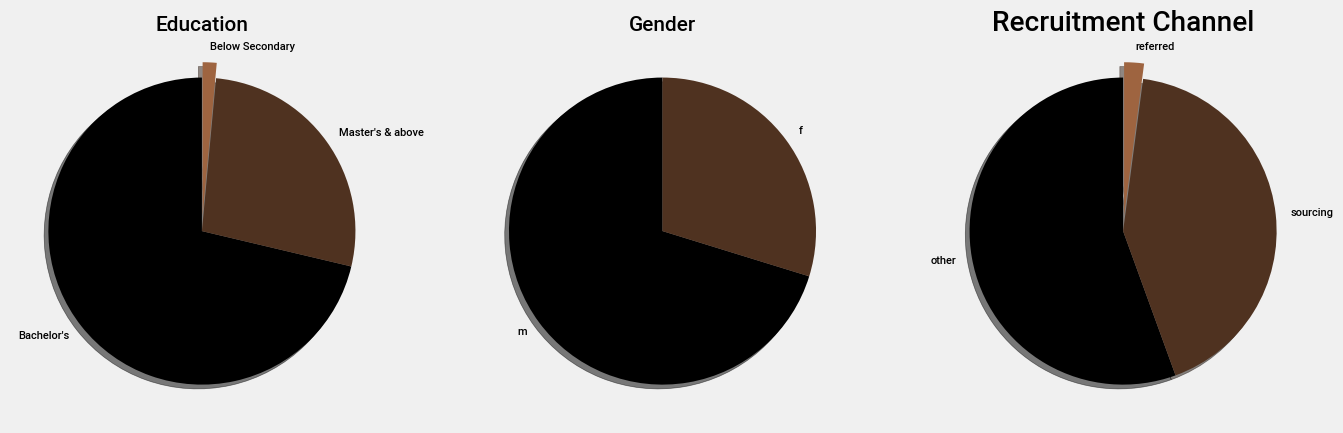

In [47]:
# let's plot the pie charts of the columns where we have few categories 
plt.rcParams['figure.figsize'] = (15,5)

# plotting a pie chart to represent share of Previous year Rating of the Employees
plt.subplot(1,3,1)
labels = train['education'].value_counts().index
sizes = train[ 'education'].value_counts()
colors = plt.cm.copper(np.linspace(0,1,5))
explode = [0,0,0.1]

plt.pie(sizes , labels = labels , colors = colors , explode = explode , shadow = True , startangle = 90)
plt.title('Education', fontsize = 15)

# plotting a pie chart to represent share of Previous year Rating of the Employees
plt.subplot(1,3,2)
labels = train['gender'].value_counts().index
sizes = train['gender'].value_counts()
colors = plt.cm.copper(np.linspace(0,1,5))
explode = [0,0]

plt.pie(sizes , labels = labels , colors = colors , explode = explode , shadow = True , startangle = 90)
plt.title('Gender', fontsize =  15)

# plotting a pie chart to represent share of Previous year Rating of the Employees
plt.subplot(1,3,3)
labels = train['recruitment_channel'].value_counts().index
sizes = train['recruitment_channel'].value_counts()
colors = plt.cm.copper(np.linspace(0,1,5))
explode = [0,0,0.1]

plt.pie(sizes,labels = labels , colors = colors , explode = explode , shadow = True , startangle = 90)
plt.title('Recruitment Channel')
#Explode 
# The explode argument in pyplot pie decides which part should explode (separate and move a distance from the center). This argument accepts a tuple of numeric values, and each non-zero value represents the distance of that slice from the center of a pie chart. In this Python pie chart example, we exploded medium priority from the center.

In [48]:
# interactive function for plotting univariate charts for categorical data

plt.rcParams['figure.figsize'] = (15, 4)
@interact_manual
def check(column = list(train.select_dtypes('object').columns),
          palette = ['cividis','copper','spring','Reds','Blues']):
    sns.countplot(train[column], palette = palette)
   
    plt.show()

interactive(children=(Dropdown(description='column', options=('department', 'region', 'education', 'gender', '…

## Bivariate Anlaysis

Bivariate analysis is one of the simplest forms of quantitative analysis. It involves the analysis of two variables, for the purpose of determining the empirical relationship between them. Bivariate analysis can be helpful in testing simple hypotheses of association.

#### Types of Bivariate Analysis

##### 1)Categorical vs Categorical
###### 2)Categorical vs Numerical
###### 3)Numerical vs Numerical

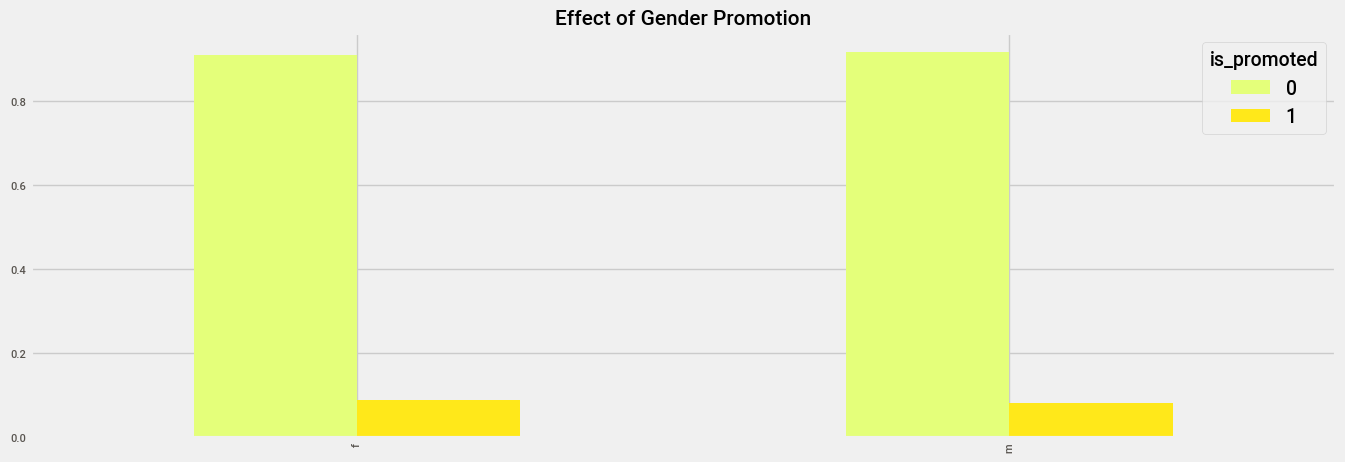

In [49]:
# Compare gender gap in promotion 

plt.rcParams['figure.figsize']= (15,5)
x = pd.crosstab(train['gender'], train['is_promoted'])
colors = plt.cm.Wistia(np.linspace(0,1,5))
x.div(x.sum(1).astype(float),axis=0).plot(kind = 'bar' , stacked = False, color = colors)
plt.title('Effect of Gender Promotion', fontsize = 15)
plt.xlabel('')
plt.show()

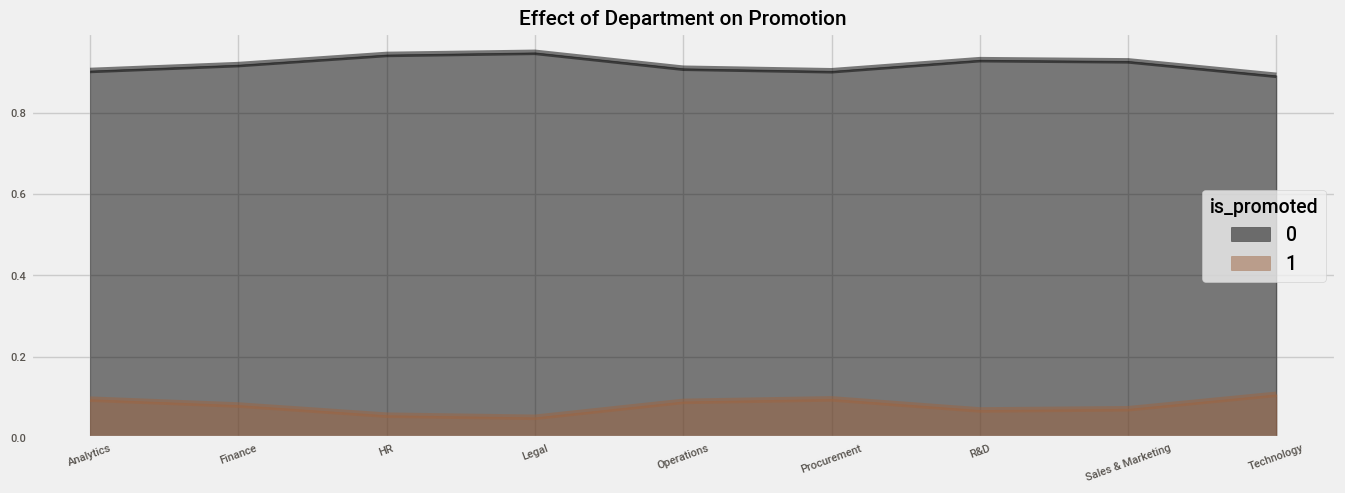

In [50]:
# Compare different departments and Promotion
plt.rcParams['figure.figsize'] = (15,5)
x = pd.crosstab(train['department'],train['is_promoted'])
colors = plt.cm.copper(np.linspace(0,1,3))
x.div(x.sum(1).astype(float),axis=0).plot(kind = 'area', stacked = False , color = colors)
plt.title('Effect of Department on Promotion', fontsize = 15)
plt.xticks(rotation = 20)
plt.xlabel('')
plt.show()

From above graphical representation it shows there is alomost similar effect on promotion.Wecan sayt hat all departments have similar effect on promotion.It doesn't contribute a lot in making a Machine Learning Model.(Not able to prdeict wheather Employee should get promotion or not) 

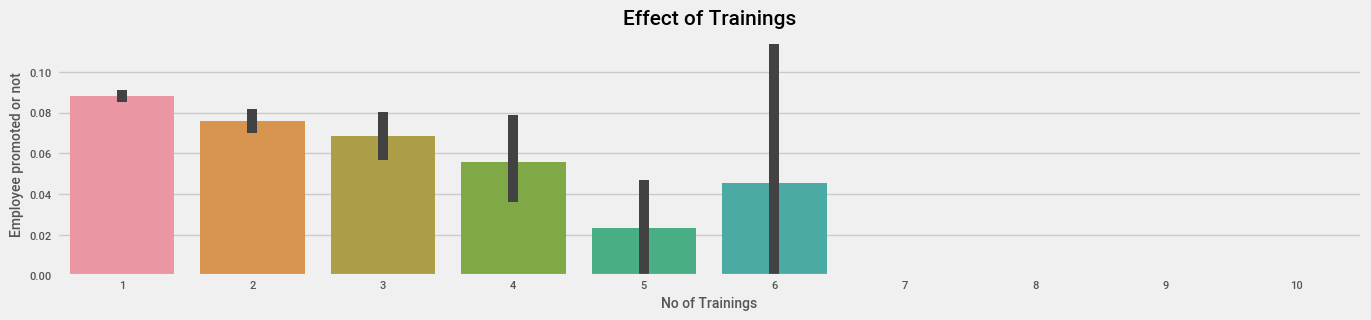

In [51]:
# Checking effect of number of trainings for promotion
plt.rcParams['figure.figsize'] = (15,3)
sns.barplot(train['no_of_trainings'], train['is_promoted'])
plt.title('Effect of Trainings' ,fontsize = 15)
plt.xlabel('No of Trainings', fontsize = 10)
plt.ylabel('Employee promoted or not',fontsize = 10)
plt.show()

It is clear hat from above graph who takes more  than 5 trainings will not get promoted.

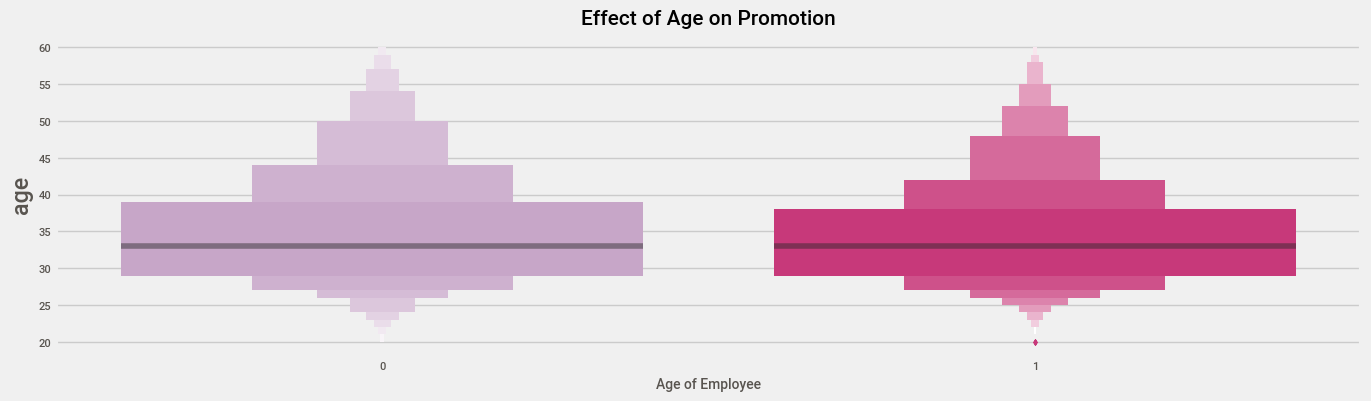

In [52]:
# Effect of Age on Promotion
plt.rcParams['figure.figsize'] = (15,4)
sns.boxenplot(train['is_promoted'], train['age'], palette = 'PuRd')
plt.title('Effect of Age on Promotion' , fontsize = 15)
plt.xlabel('Employee get promoted or not ?', fontsize = 10)
plt.xlabel('Age of Employee', fontsize = 10)
plt.show()

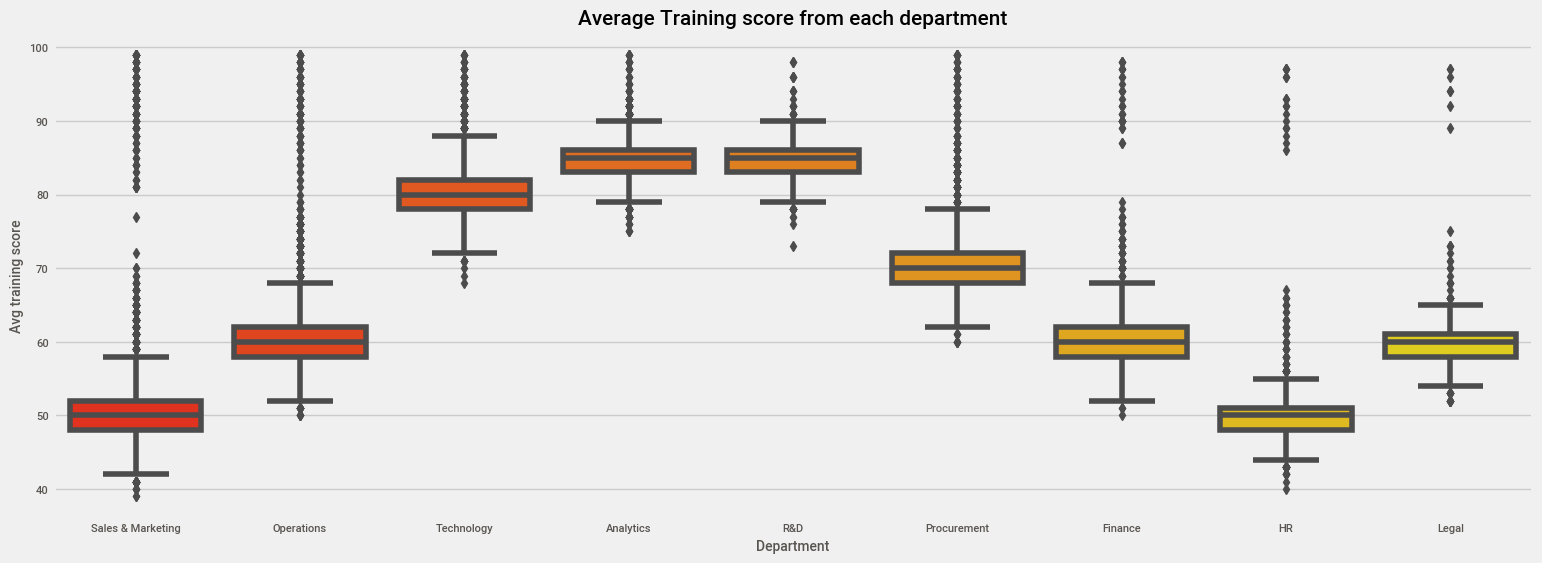

In [53]:
# Department vs Average training score
plt.rcParams['figure.figsize'] = (17,6)
sns.boxplot(train['department'], train['avg_training_score'], palette = 'autumn')
plt.title('Average Training score from each department', fontsize = 15)
plt.xlabel('Department', fontsize = 10)
plt.ylabel('Avg training score', fontsize = 10)
plt.show()

In [54]:
# Let's Make interactive function for Bivariate Analysis
plt.rcParams['figure.figsize'] = (15,5)
@interact_manual
def  bivariate_plot(column1 = list(train.select_dtypes('object').columns),
                    column2 = list(train.select_dtypes('number').columns[1:])):
    sns.boxplot(train[column1],train[column2])

interactive(children=(Dropdown(description='column1', options=('department', 'region', 'education', 'gender', …

In [55]:
# lets make an Interactive Function for Bivariate Analysis
plt.rcParams['figure.figsize'] = (15,5)
@interact_manual
def bivariate_plot(column1 = list(train.select_dtypes('object').columns),
                  column2 = list(train.select_dtypes('number').columns[1:])):
    sns.boxenplot(train[column1],train[column2])                  

interactive(children=(Dropdown(description='column1', options=('department', 'region', 'education', 'gender', …

# Multivariate Analysis

### Multivariate analysis is based on the principles of multivariate statistics, which involves observation and analysis of more than one statistical outcome variable at a time.

####  First, we will use the Correlation Heatmap to check the correlation between the Numerical Columns
#### Check the ppscore or the Predictive Score to check the correlation between all the columns present in the data.
#### Use Bubble Charts, split Violin plots, Hue with Bivariate Plots.

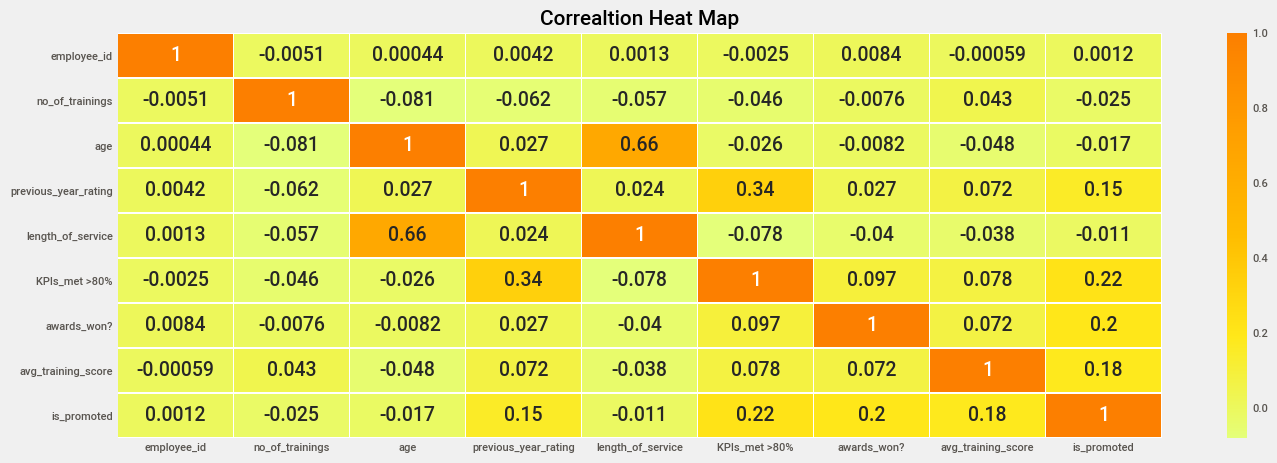

In [56]:
# lets check the Heat Map for the Data with respect to correlation.
plt.rcParams['figure.figsize'] = (15,5)
sns.heatmap(train.corr(),annot = True ,linewidth = 0.5,cmap = 'Wistia')
plt.title('Correaltion Heat Map',fontsize = 15)
plt.show()

From above graph we can say that length of service and age are highly coorelated.
And also previous year rating and KPI are correlated to each othe

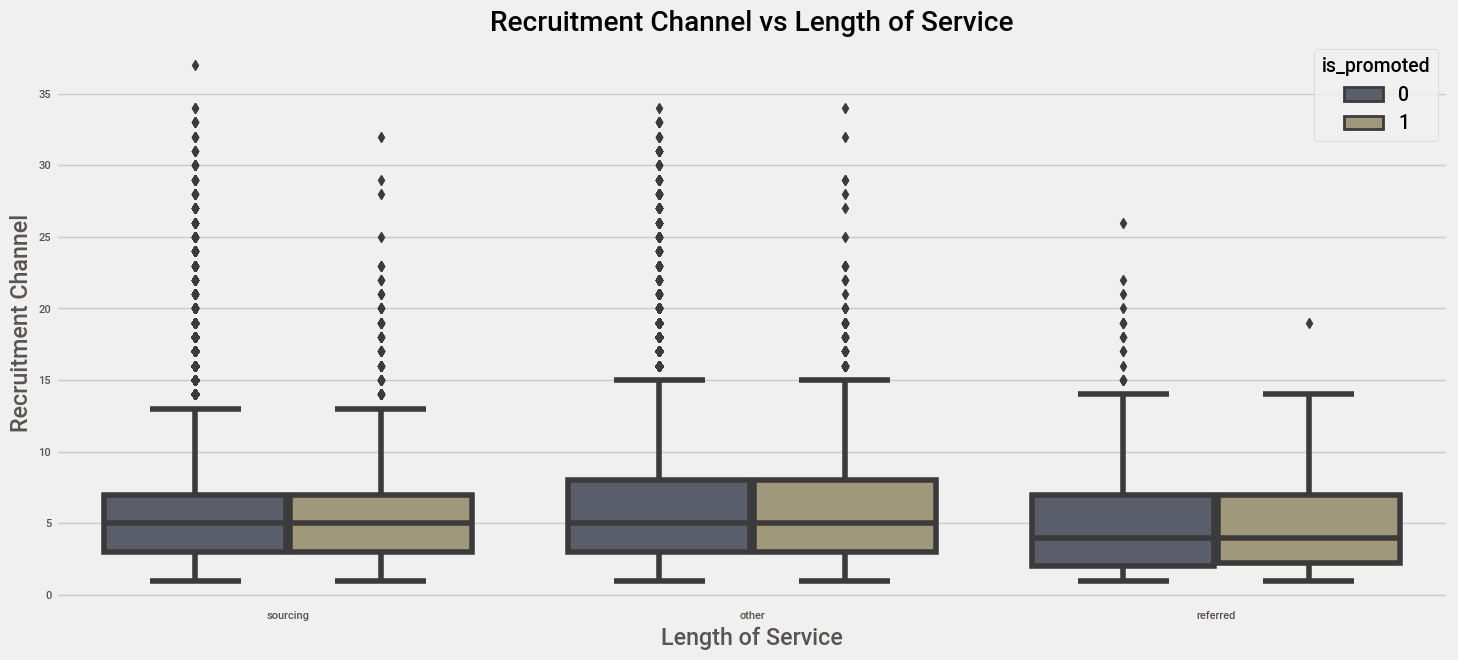

In [57]:
# Check the relation of recruitment Channel, length of service and Promotions when they won awards ?
plt.rcParams['figure.figsize'] =(16,7)
sns.boxplot(train['recruitment_channel'],
           train['length_of_service'],
            hue = train['is_promoted'],
            palette = 'cividis')
plt.title('Recruitment Channel vs Length of Service')
plt.ylabel('Recruitment Channel')
plt.xlabel('Length of Service')
plt.show()

In [58]:
train

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,Bachelor's,m,sourcing,1,29,1.0,2,0,0,45,0


Text(0.5, 0, 'Departments')

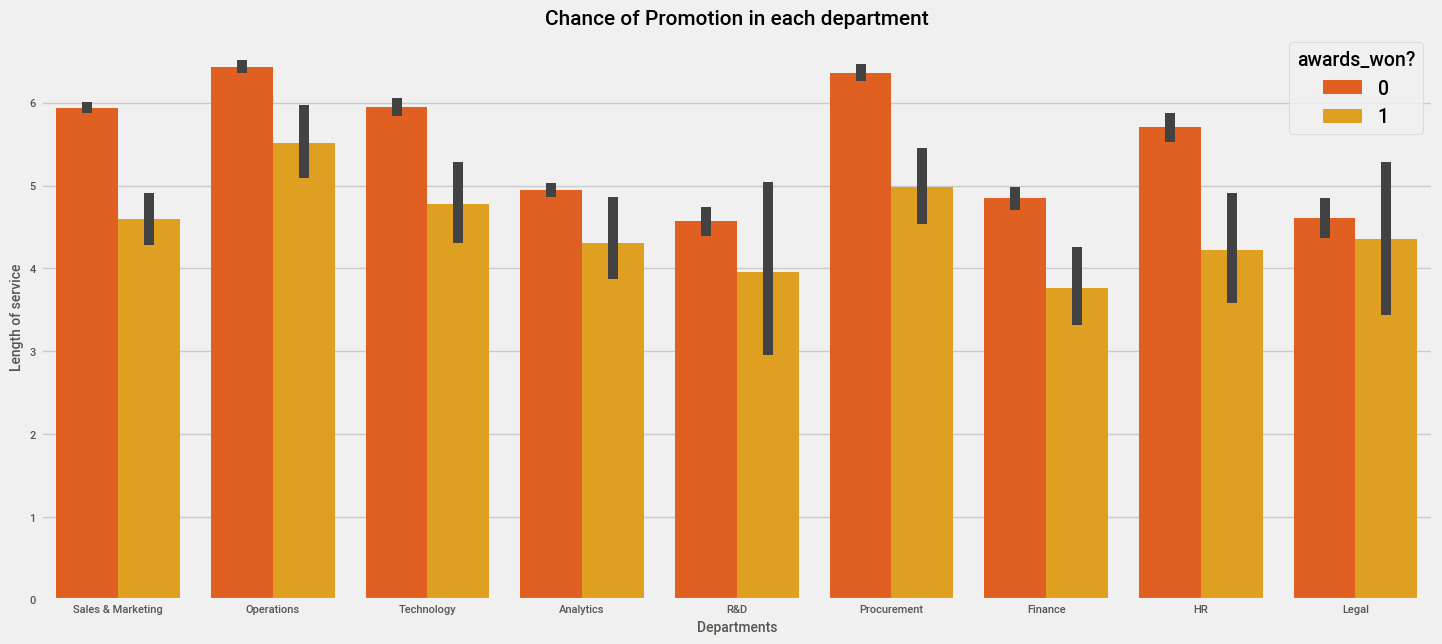

In [59]:
# lets check the relation of Departments and Promotions when they won awards ?
plt.rcParams['figure.figsize'] = (16,7)
sns.barplot(train['department'],train[ 'length_of_service'],hue = train[ 'awards_won?'],palette = 'autumn')
plt.title('Chance of Promotion in each department', fontsize = 15)
plt.ylabel('Length of service',fontsize=10)
plt.xlabel('Departments',fontsize = 10)

# FEATURE ENGINEERING

Feature engineering is the process of using domain knowledge to extract features from raw data via data mining techniques. These features can be used to improve the performance of machine learning algorithms. Feature engineering can be considered as applied machine learning itself.

#### There are mutliple ways of performing feature engineering.

So many people in the Industry consider it the most important step to improve the Model Performance.

We should always understand the columns well to make some new features using the old existing features.

## Let's discuss the ways how we can perform feature engineering

We can perform Feature Engineering by removing Unnecassary Columns

Extracting Features from the Date and Time Features.

Extracting Features from the Categorcial Features.

Binnning the Numerical and Categorical Features.

Aggregating Multiple Features together by using simple Arithmetic operations.

In [60]:
# lets create some extra features from existing features to improve our Model
# creating a metric of sum
train['sum_metric'] = train['awards_won?']+ train['KPIs_met >80%'] + train['previous_year_rating']
test['sum_metric'] = test['awards_won?']+test['KPIs_met >80%'] + test['previous_year_rating']

# Creating total score column
train['total_score'] = train['avg_training_score'] * train['no_of_trainings']
test['total_score'] = test['avg_training_score'] * test['no_of_trainings']

In [61]:
# lets remove some of the columns which are not very useful for predicting the promotion.

train = train.drop(['recruitment_channel', 'region', 'employee_id'], axis = 1)
test = test.drop(['recruitment_channel', 'region', 'employee_id'], axis = 1)

# lets check the columns in train and test data set after feature engineering
train.columns

Index(['department', 'education', 'gender', 'no_of_trainings', 'age',
       'previous_year_rating', 'length_of_service', 'KPIs_met >80%',
       'awards_won?', 'avg_training_score', 'is_promoted', 'sum_metric',
       'total_score'],
      dtype='object')

### Grouping & Filtering Operations
###### The grouping operations are the fundamental components of the entity clustering technique. They define what collections of entities and relationships comprise higher-level objects, the entity clusters.

In [62]:
# let's check the realtionship between KPIs and promotion 
x = pd.crosstab(train['KPIs_met >80%'],train['is_promoted'])
x.style.background_gradient(cmap = 'bone')

is_promoted,0,1
KPIs_met >80%,,
0,34111,1406
1,16029,3262


In [63]:
#lets check the relation between the Awards and Promotion
x = pd.crosstab(train['awards_won?'],train['is_promoted'])
x.style.background_gradient(cmap='bone')

is_promoted,0,1
awards_won?,,
0,49429,4109
1,711,559


In [64]:
# lets check the no. eployees who won awards from each Department
train[['department', 'awards_won?']].groupby(['department']).agg('sum').sort_values(by = 'awards_won?',
                                                            ascending = False).style.background_gradient('magma')

,awards_won?
department,
Sales & Marketing,361
Operations,262
Technology,185
Procurement,171
Analytics,130
Finance,70
HR,45
Legal,25
R&D,21


In [65]:
# lets group the employees based on their Education
@interact
def group(column = list(train.select_dtypes('object').columns)):
    return train[[column,'is_promoted']].groupby([column]).agg(['count',
                                                              'sum','mean','max']).style.background_gradient(cmap='viridis')

interactive(children=(Dropdown(description='column', options=('department', 'education', 'gender'), value='dep…

In [66]:
# lets use the interactive function to make it more reusable
@interact
def group_operations(column = list(train.select_dtypes('object').columns),
                     column2 = list(train.select_dtypes('number').columns)[1:]):
    return train[[column,column2]].groupby([column]).agg('count').style.background_gradient(cmap = 'Wistia')

interactive(children=(Dropdown(description='column', options=('department', 'education', 'gender'), value='dep…

In [67]:
# lets get the names of all the employees who have taken trainings more than 7 Times

@interact
def check(column = 'no_of_trainings', x = 5):
    y = train[train['no_of_trainings'] > x]
    return y['is_promoted'].value_counts()

interactive(children=(Text(value='no_of_trainings', description='column'), IntSlider(value=5, description='x',…

In [68]:
# lets also check the value counts of the number of trainings employee took.
train['no_of_trainings'].value_counts()

1     44378
2      7987
3      1776
4       468
5       128
6        44
7        12
10        5
9         5
8         5
Name: no_of_trainings, dtype: int64

In [69]:
# lets cap the values of number of trainings after 5, as the chances of promotion is negligible after 5th training 

train['no_of_trainings'] = train['no_of_trainings'].replace((6, 7, 8, 9, 10),(5, 5, 5, 5, 5))

# lets check the values of no. of trainings after capping the values
train['no_of_trainings'].value_counts()

1    44378
2     7987
3     1776
4      468
5      199
Name: no_of_trainings, dtype: int64

In [70]:
'''
lets check the no. of employee who did not get an award, did not acheive 80+ KPI, previous_year_rating as 1
and avg_training score is less than 40
but, still got promotion.
''' 

train[(train['KPIs_met >80%'] == 0) & (train['previous_year_rating'] == 1.0) & 
      (train['awards_won?'] == 0) & (train['avg_training_score'] < 60) & (train['is_promoted'] == 1)]

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,sum_metric,total_score
31860,Sales & Marketing,Bachelor's,m,1,27,1.0,2,0,0,58,1,1.0,58
51374,Sales & Marketing,Bachelor's,m,1,31,1.0,5,0,0,58,1,1.0,58


In [71]:
# lets remove the above two columns as they have a huge negative effect on our training data

# lets check shape of the train data before deleting two rows
print("Before Deleting the above two rows :", train.shape)

train = train.drop(train[(train['KPIs_met >80%'] == 0) & (train['previous_year_rating'] == 1.0) & 
      (train['awards_won?'] == 0) & (train['avg_training_score'] < 60) & (train['is_promoted'] == 1)].index)

# lets check the shape of the train data after deleting the two rows
print("After Deletion of the above two rows :", train.shape)

Before Deleting the above two rows : (54808, 13)
After Deletion of the above two rows : (54806, 13)


In [72]:
# lets check how many of the employees have greater than 30 years of service and still do not get promotion

@interact
def check_promotion(x = 20):
    x = train[(train['length_of_service'] > x)]
    return x['is_promoted'].value_counts()

interactive(children=(IntSlider(value=20, description='x', max=60, min=-20), Output()), _dom_classes=('widget-…

# Dealing with Cateogrical model


Dealing with categorical columns how?
###### Converting categorical column (objects) to numerical columns interms of  1 0r 0 becuase machine learning model only works with numerical columns.
## Various ways to encode cateogrical columns into Numerical Columns:
I am gonna use label encoder to Department and Gender columns

In [73]:
# We gonna check first what are the categorical column is present in data
train.select_dtypes('object').head()

,department,education,gender
0,Sales & Marketing,Master's & above,f
1,Operations,Bachelor's,m
2,Sales & Marketing,Bachelor's,m
3,Sales & Marketing,Bachelor's,m
4,Technology,Bachelor's,m


In [74]:
# Counts of Education 
train['education'].value_counts()

Bachelor's          39076
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

In [75]:
# lets start encoding these categorical columns to convert them into numerical columns

# lets encode the education in their degree of importance 
train['education'] = train['education'].replace(("Master's & above", "Bachelor's", "Below Secondary"),
                                                (3, 2, 1))
test['education'] = test['education'].replace(("Master's & above", "Bachelor's", "Below Secondary"),
                                                (3, 2, 1))

# lets use Label Encoding for Gender and Department to convert them into Numerical
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train['department'] = le.fit_transform(train['department'])
test['department'] = le.fit_transform(test['department'])
train['gender'] = le.fit_transform(train['gender'])
test['gender'] = le.fit_transform(test['gender'])

# lets check whether we still have any categorical columns left after encoding
print(train.select_dtypes('object').columns)
print(test.select_dtypes('object').columns)

Index([], dtype='object')
Index([], dtype='object')


In [76]:
# Lets check whether we still have any categorical columns left after encoding
print(train.select_dtypes('object').columns)
print(test.select_dtypes('object').columns)
train.head(3)

Index([], dtype='object')
Index([], dtype='object')


,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,sum_metric,total_score
0,7,3,0,1,35,5.0,8,1,0,49,0,6.0,49
1,4,2,1,1,30,5.0,4,0,0,60,0,5.0,60
2,7,2,1,1,34,3.0,7,0,0,50,0,3.0,50


# Splitting Data

###### This is one of the most Important step to perform Machine Learning Prediction on a Dataset, you have to separate the target and independent Columns.

In [77]:
# Let's split the target data  from train data

y = train['is_promoted']  # target variable 
x = train.drop(['is_promoted'],axis = 1)
x_test = test

# let's print the shapes of newly formed datasets 
print('Shape of x :', x.shape)
print('Shape of y :', y.shape)
print('Shape of x test:', x_test.shape)

Shape of x : (54806, 12)
Shape of y : (54806,)
Shape of x test: (23490, 12)


# Resampling 

Resampling is the method that consists of drawing repeated samples from the original data samples. The method of Resampling is a nonparametric method of statistical inference.

#### In this Problem we have noticed that the target column is highly imbalanced, we need to balance the data by using some Statistical Methods.

### There are many Statistical Methods we can use for Resampling the Data such as:
Over Samping

Cluster based Sampling

Under Sampling

In [78]:
# It is very important to resample the data, as the target class is highly imbalanced.
# Here We are going to use Over Sampling Technique to resample the data.
# lets import the SMOTE algorithm to do the same.

from imblearn.over_sampling import SMOTE

x_resample , y_resample = SMOTE().fit_sample(x , y.values.ravel())

print(x_resample.shape)
print(y_resample.shape)

(100280, 12)
(100280,)


In [79]:
# Let's check the value counts of target variable 4
print('Before Sampling :')
print(y.value_counts())
print('After sampling :')
y_resample = pd.DataFrame(y_resample)
print(y_resample[0].value_counts())

Before Sampling :
0    50140
1     4666
Name: is_promoted, dtype: int64
After sampling :
1    50140
0    50140
Name: 0, dtype: int64


In [80]:
# lets create a validation set from the training data so that we can check whether the model that we have created is good enough
# lets import the train_test_split library from sklearn to do that

from sklearn.model_selection import train_test_split

x_train,x_valid , y_train , y_valid = train_test_split(x_resample , y_resample, test_size = 0.2,random_state = 0)

# Let's print shape
print('Shape of x train :',x_train.shape)
print('Shape of y train :',y_train.shape)
print('Shape of x valid tain:', x_valid.shape)
print('Shape of y valid train:',y_valid.shape)
print('Shape of x Test :',x_test.shape)

Shape of x train : (80224, 12)
Shape of y train : (80224, 1)
Shape of x valid tain: (20056, 12)
Shape of y valid train: (20056, 1)
Shape of x Test : (23490, 12)


# Feature Scaling

Feature scaling is a method used to normalize the range of independent variables or features of data. In data processing, it is also known as data normalization and is generally performed during the data preprocessing 

![image.png](attachttp://localhost:8888/files/Workshop%20Datasets/image.pnghment:image.png)

In [81]:
# Feature Scaling is important for scaling the datasets - we will use standardization method (commnly used)
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_valid = sc.transform(x_valid)
x_test = sc.transform(x_test)

# Decisions Tree

A decision tree is a decision support tool that uses a tree-like model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility. It is one way to display an algorithm that only contains conditional control statements.

In [82]:
train.head()

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,sum_metric,total_score
0,7,3,0,1,35,5.0,8,1,0,49,0,6.0,49
1,4,2,1,1,30,5.0,4,0,0,60,0,5.0,60
2,7,2,1,1,34,3.0,7,0,0,50,0,3.0,50
3,7,2,1,2,39,1.0,10,0,0,50,0,1.0,100
4,8,2,1,1,45,3.0,2,0,0,73,0,3.0,73


Training Accuracy : 0.9902896888711608
Testing Accuracy : 0.9328380534503391


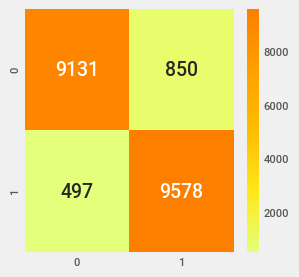

In [83]:
# Lets use Decision Trees to classify the data
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_valid, y_valid))

cm = confusion_matrix(y_valid, y_pred)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'Wistia', fmt = '.8g')
plt.show()

In [84]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.feature_selection import RFECV

# The "accuracy" scoring is proportional to the number of correct classifications
model = DecisionTreeClassifier() 
rfecv = RFECV(estimator = model, step = 1, cv = 5, scoring = 'accuracy')
rfecv = rfecv.fit(x_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
x_train = pd.DataFrame(x_train)
print('Best features :', x_train.columns[rfecv.support_])

Optimal number of features : 12
Best features : Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], dtype='int64')


In [85]:
# lets take a look at the Classification Report
cr = classification_report(y_valid, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.95      0.91      0.93      9981
           1       0.92      0.95      0.93     10075

    accuracy                           0.93     20056
   macro avg       0.93      0.93      0.93     20056
weighted avg       0.93      0.93      0.93     20056



In [86]:
train.describe()

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,sum_metric,total_score
count,54806.000000,54806.000000,54806.000000,54806.000000,54806.000000,54806.000000,54806.000000,54806.000000,54806.000000,54806.000000,54806.000000,54806.000000,54806.000000
mean,4.972722,2.257636,0.702368,1.250684,34.804127,3.304565,5.865599,0.351987,0.023173,63.386947,0.085137,3.679725,79.771430
std,2.506061,0.469723,0.457221,0.589462,7.660219,1.214712,4.265138,0.477594,0.150453,13.371764,0.279088,1.463326,43.879739
min,0.000000,1.000000,0.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000,1.000000,39.000000
25%,4.000000,2.000000,0.000000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000,3.000000,53.000000
50%,5.000000,2.000000,1.000000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000,4.000000,64.000000
75%,7.000000,3.000000,1.000000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000,5.000000,84.000000
max,8.000000,3.000000,1.000000,5.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000,7.000000,710.000000


In [87]:
# lets perform some Real time predictions on top of the Model that we just created using Decision Tree Classifier

# lets check the parameters we have in our Model
'''
department -> The values are from 0 to 8, (Department does not matter a lot for promotion)
education -> The values are from 0 to 3 where Masters-> 3, Btech -> 2, and secondary ed -> 1
gender -> the values are 0 for female, and 1 for male
no_of_trainings -> the values are from 0 to 5
age -> the values are from 20 to 60
previou_year_rating -> The values are from 1 to 5
length_of service -> The values are from 1 to 37
KPIs_met >80% -> 0 for Not Met and 1 for Met
awards_won> -> 0-no, and 1-yes
avg_training_score -> ranges from 40 to 99
sum_metric -> ranges from 1 to 7
total_score -> 40 to 710
'''

'\ndepartment -> The values are from 0 to 8, (Department does not matter a lot for promotion)\neducation -> The values are from 0 to 3 where Masters-> 3, Btech -> 2, and secondary ed -> 1\ngender -> the values are 0 for female, and 1 for male\nno_of_trainings -> the values are from 0 to 5\nage -> the values are from 20 to 60\npreviou_year_rating -> The values are from 1 to 5\nlength_of service -> The values are from 1 to 37\nKPIs_met >80% -> 0 for Not Met and 1 for Met\nawards_won> -> 0-no, and 1-yes\navg_training_score -> ranges from 40 to 99\nsum_metric -> ranges from 1 to 7\ntotal_score -> 40 to 710\n'

In [88]:
prediction = rfecv.predict(np.array([[2, #department code
                                      3, #masters degree
                                      1, #male
                                      1, #1 training
                                      30, #30 years old
                                      5, #previous year rating
                                      10, #length of service
                                      1, #KPIs met >80%
                                      1, #awards won
                                      95, #avg training score
                                      7, #sum of metric 
                                      700 #total score
                                     ]]))

print("Whether the Employee should get a Promotion : 1-> Promotion, and 0-> No Promotion :", prediction)

Whether the Employee should get a Promotion : 1-> Promotion, and 0-> No Promotion : [0]


In [89]:
# Serialization
import joblib
# Save the model
joblib.dump(model,'hranlaytics.pkl')

['hranlaytics.pkl']